# Groupe :
Mehdi FERHAT, Roxane DOUC.

# ``TIMESERIES Anaylsis``

## Supervisé par : Florian IELPO


### Résumé :
Le projet vise à analyser l'impact d'un choc d'inflation sur l'économie américaine ainsi que sur les actions et les taux américains.

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv(r"Data_project.csv", sep=";", decimal=",", parse_dates=["dates"],index_col=["dates"])
df.head(10)

,Inflation,Fed Fund Rate,GDP,10-year real rates,Value,Market
dates,,,,,,
1963-03-31,0.004279,0.0012,0.011221,"0,028230527",0.0190,0.0308
1963-06-30,0.003278,0.0000,0.021984,"0,026759351",0.0077,-0.0200
1963-09-30,0.003594,0.0050,0.006556,"0,030838067",0.0008,-0.0157
1963-12-31,0.005208,0.0000,0.021083,"0,024941804",-0.0008,0.0183
1964-03-31,0.001943,0.0000,0.010887,"0,02820626",0.0336,0.0141
1964-06-30,0.002262,0.0000,0.015623,"0,028432375",0.0063,0.0127
1964-09-30,0.002257,0.0000,0.003089,"0,03008125",0.0170,0.0269
1964-12-31,0.005470,0.0050,0.024198,"0,030118135",-0.0248,0.0003
1965-03-31,0.001920,0.0000,0.012633,"0,03004137",0.0103,-0.0134


On peut remarquer que malgré la séparation par ";" et la détection des décimales par virgule la variable 10-year real rates reste ininterprétable. Nous allons donc changer son format mais également renommer les variables pour éviter d'eventuelles erreurs.

In [ ]:
df = df.rename(columns={'10-year real rates' : '10_year_real_rates', 'Fed Fund Rate' : 'Fed_Fund_Rate'})
df["10_year_real_rates"]=df["10_year_real_rates"].str.replace(',','.')
df["10_year_real_rates"] = pd.to_numeric(df['10_year_real_rates'], errors='coerce')
df.tail()

,Inflation,Fed_Fund_Rate,GDP,10_year_real_rates,Value,Market
dates,,,,,,
2020-09-30,0.011143,0.0004,0.011153,-0.007200,-0.0266,-0.0363
2020-12-31,0.005424,0.0000,0.015339,-0.003701,-0.0156,0.0463
2021-03-31,0.012360,-0.0002,0.016407,-0.008973,0.0732,0.0308
2021-06-30,0.023369,-0.0001,0.005709,-0.038745,-0.0781,0.0275
2021-09-30,0.011650,0.0002,0.016791,-0.038573,0.0509,-0.0437


In [ ]:
df.describe()

,Inflation,Fed_Fund_Rate,GDP,10_year_real_rates,Value,Market
count,235.000000,235.000000,235.000000,229.000000,235.000000,235.000000
mean,0.009438,-0.000119,0.007311,0.021826,0.001709,0.003488
std,0.008189,0.010708,0.011191,0.024689,0.027217,0.039132
min,-0.034170,-0.052700,-0.089373,-0.046950,-0.140200,-0.133800
25%,0.005023,-0.003200,0.003451,0.008359,-0.012850,-0.016950
50%,0.007775,0.000100,0.007490,0.020078,0.002300,0.007800
75%,0.012464,0.002950,0.011219,0.036248,0.015200,0.028150
max,0.041612,0.069700,0.075475,0.095140,0.082300,0.108400


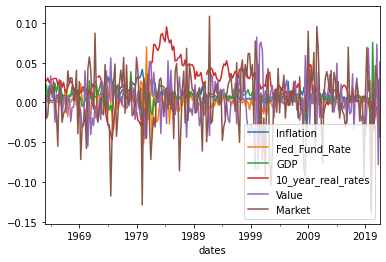

In [ ]:
df.plot()

## Graphiques des moyennes et écarts-types mobiles

Variable : Inflation


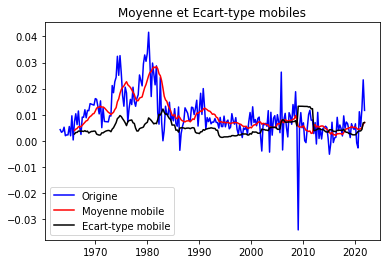

Variable : Fed_Fund_Rate


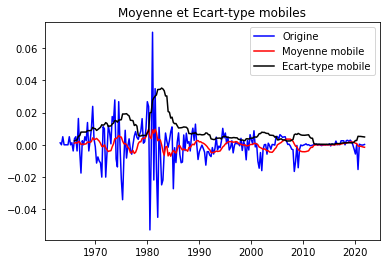

Variable : GDP


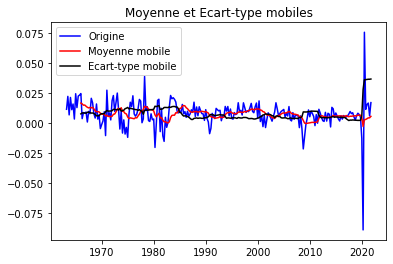

Variable : 10_year_real_rates


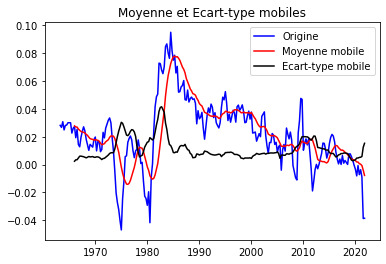

Variable : Value


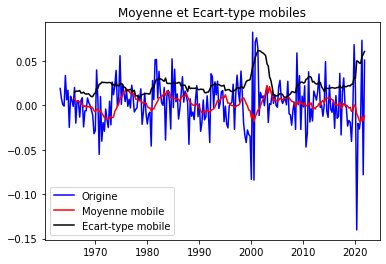

Variable : Market


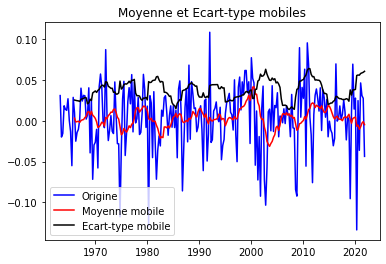

In [ ]:
for variables in df.columns:
    print("Variable :", variables)
    rolling_mean = df[variables].dropna().rolling(window = 12).mean()
    rolling_std = df[variables].dropna().rolling(window = 12).std()
    plt.plot(df[variables].dropna(), color = 'blue', label = 'Origine')
    plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
    plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
    plt.legend(loc = 'best')
    plt.title('Moyenne et Ecart-type mobiles')
    plt.show()

## Test de stationnarité de Dickey-Fuller

In [ ]:
for variables in df.columns:
    print('─' * 10)
    print("Test de la variable :", variables, "\n")
    print('─' * 10)
    result = adfuller(df[variables].dropna())

    print('Statistique ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

──────────
Test de la variable : Inflation 

──────────
Statistique ADF : -3.437012169919129
p-value : 0.009760008764997033
Valeurs Critiques :
	1%: -3.458854867412691
	5%: -2.8740800599399323
	10%: -2.573453223097503
──────────
Test de la variable : Fed_Fund_Rate 

──────────
Statistique ADF : -6.380103637604573
p-value : 2.2332516811492305e-08
Valeurs Critiques :
	1%: -3.4594900381360034
	5%: -2.8743581895178485
	10%: -2.573601605503697
──────────
Test de la variable : GDP 

──────────
Statistique ADF : -15.0061497557508
p-value : 1.0720463220736543e-27
Valeurs Critiques :
	1%: -3.4586084859607156
	5%: -2.873972159235721
	10%: -2.57339565928848
──────────
Test de la variable : 10_year_real_rates 

──────────
Statistique ADF : -2.34676162521577
p-value : 0.15732942991605586
Valeurs Critiques :
	1%: -3.459884913337196
	5%: -2.8745310704320794
	10%: -2.573693840082908
──────────
Test de la variable : Value 

──────────
Statistique ADF : -9.79169282327579
p-value : 6.328530351701515e-17


**Commentaire**

En observant les graphiques de même que les test où l'on rejette l'hypothèse nulle sauf pour la variable ``10_year_real_rates``, nous allons effectuer une différence première pour régler le problème de cette variable.

In [ ]:
df['10_year_real_rates'] = df['10_year_real_rates'].diff()

In [ ]:
result = adfuller(df['10_year_real_rates'].dropna())

print('Statistique ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistique ADF : -7.894583342598169
p-value : 4.345133708806332e-12
Valeurs Critiques :
	1%: -3.460707667106296
	5%: -2.874891213486339
	10%: -2.573885987711472


**Commentaire**

La variable est maintenant visiblement stationnaire.

## Partie 1 - Estimation des surprises d'inflation (8 points)

**Question 1**. Faites apparaitre l'ACF et la PACF de chacune des variables présentes dans votre jeu de données. Décrivez ce que vous voyez et quelles sont les conclusions que vous en tirez.

**Réponse**:

Il est assez difficile et imprécis de déterminer le processus et l'ordre d'une série en observant les fonction d'autocorrélations. Pour autant un processus autorégressif ressort assez clairement avec une décroissance progressive de l'ACF ainsi qu'une chute brutale dans le PACF précisément au lag 4 dans le cas de la variable ``Inflation``. Pour les autres variables on ne voit pratiquement aucun lien avec leurs retards, l'ACF et le PACF étant des fonctions de covariance dans notre cas ce n'est presque jamais significatif ou très peu.

C:\Users\Mehdi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


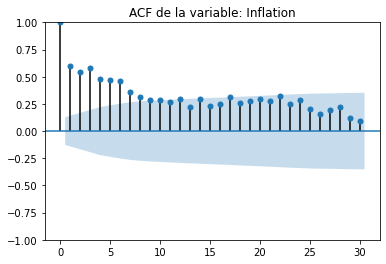

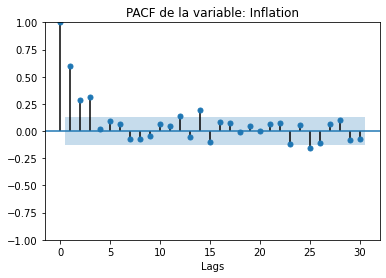

C:\Users\Mehdi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


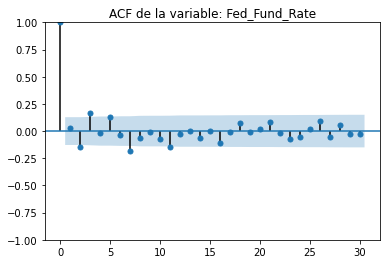

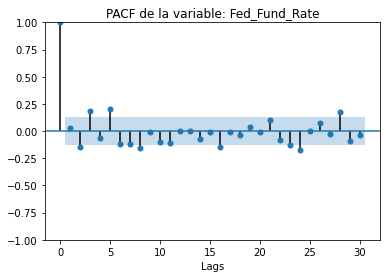

C:\Users\Mehdi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


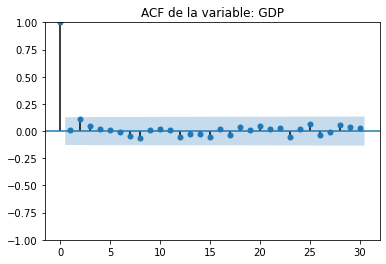

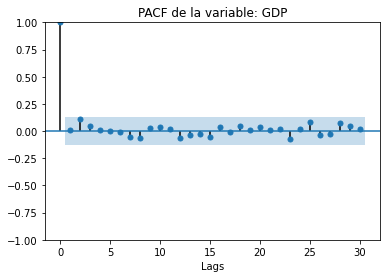

C:\Users\Mehdi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


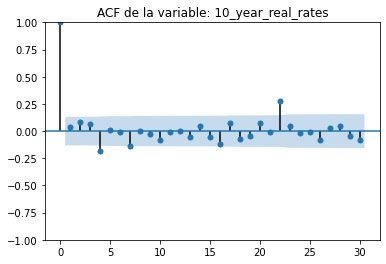

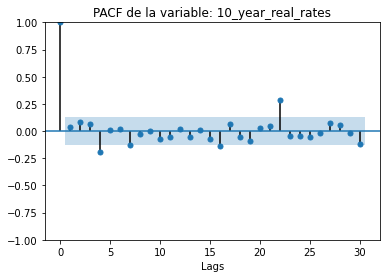

C:\Users\Mehdi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


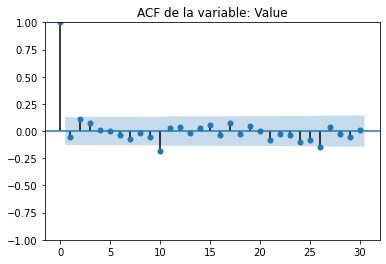

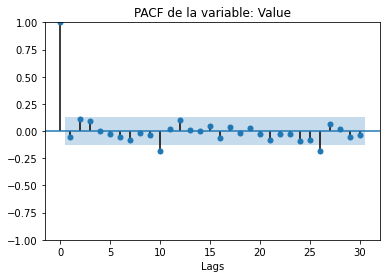

C:\Users\Mehdi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


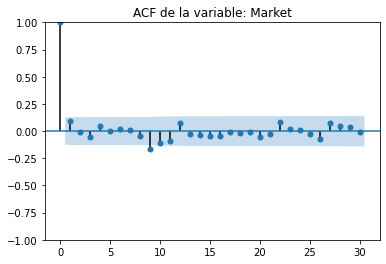

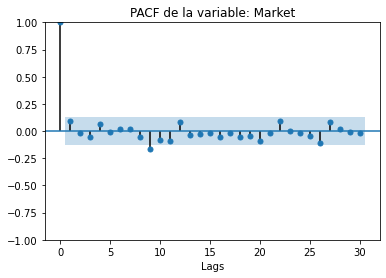

In [ ]:
# Réponse à la question 2

liste_variables = ['Inflation', 'Fed_Fund_Rate', 'GDP', '10_year_real_rates', 'Value', 'Market']

for w in liste_variables:
    plot_acf(df[w].dropna(), title = "ACF de la variable: {}".format(w),lags=30)
    plot_pacf(df[w].dropna(), title = "PACF de la variable: {}".format(w),lags=30)
    plt.xlabel("Lags")
    plt.show()

**Question 2**. En utilisant la vraisemblance codée en cours que vous modifierez en conséquence, estimez par maximum de vraisemblance un modele AR(2) sur les variations trimestrielles de l'inflation.

In [ ]:
# Réponse à la question 2

from scipy.stats import norm
def ML_criterion_ar2(para,x, plot=False):
    phi0=para[0]
    phi1=para[1]
    phi2=para[2]
    expected=phi0+phi1*x.iloc[0:-1]+phi2*x.iloc[0:-2]
    expected.index=x.index[1:len(x)]
    temp=pd.concat([x,expected],axis=1)
    temp.columns=['initial','fit']
    temp=temp.dropna()
    difference=temp['initial']-temp['fit']
    volatility=np.nanstd(difference)
    loglik=norm.pdf(temp['initial'],temp['fit'],volatility)
    criterion=np.nansum(np.log(loglik))
    if plot==True:
        temp.plot()
    return -criterion

from scipy.optimize import minimize
x0 = np.array([0.3,0.9,0.5])
res_EV = minimize(ML_criterion_ar2, x0, method='BFGS', args=(df['Inflation']),hess=True,options={'disp': False})
res_EV.x

C:\Users\Mehdi\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
<ipython-input-11-761859c1e19c>:16: RuntimeWarning: divide by zero encountered in log
  criterion=np.nansum(np.log(loglik))
C:\Users\Mehdi\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
<ipython-input-11-761859c1e19c>:16: RuntimeWarning: divide by zero encountered in log
  criterion=np.nansum(np.log(loglik))


array([0.00378855, 0.5031055 , 0.10125585])

-840.9069216471653

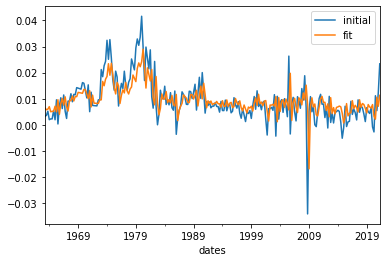

In [ ]:
para=[0.00380182, 0.05273664, 0.55274344]
ML_criterion_ar2(para,df['Inflation'], plot=True)

**Question 3**. Testez la significativité des paramètres de votre modèle et présentez pour cela un test de Student, comme fait en cours.

In [ ]:
# Calcul de l'écart type

std_para=np.diag(res_EV.hess_inv)**.5

# Computation du test

print(res_EV.x/std_para)

[5.36573921 0.71095332 0.14308739]


**Commentaire** :
 Au seuil 95%, on a T de student = (0.975, N-(p+1) = ∝) = 1.96. Seulement Phi 0 est significatif.

**Question 4**. Calculez des résidus de votre regression et représentez les graphiquement, ainsi que leur somme cumulée en fonction des dates. Que voyez vous? Nous appelerons les résidus non-cumulés "surprise d'inflation". Pourquoi?

In [ ]:
# Création de la fonction pour récupérer les résidus

def get_residuals(coefficients, series):
    phi0=para[0]
    phi1=para[1]
    phi2=para[2]
    expected=phi0+phi1*x.iloc[0:-1]+phi2*x.iloc[0:-2]
    expected.index=x.index[1:len(x)]
    temp=pd.concat([x,expected],axis=1)
    temp.columns=['initial','fit']
    temp=temp.dropna()
    difference=temp['initial']-temp['fit']
    return difference

para=[0.00380182, 0.05273664, 0.55274344]
x = df['Inflation']
residuals = get_residuals(para, x)

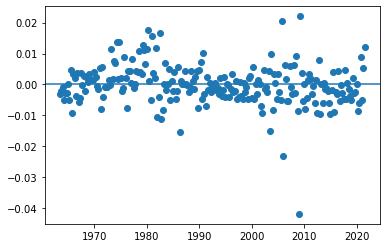

In [ ]:
plt.scatter(residuals.index, residuals)
plt.axhline(y=0)
plt.show()

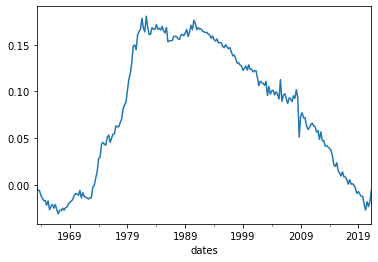

In [ ]:
residuals.cumsum().plot()

**Réponse:**

On peut voir que globalement les résidus sont plutôt homoscédastiques mais avec des fortes variations ponctuelles notamment dans les années 70-80 avec une inflation plus élevée que prévue que l'on pourrait imputer aux chocs pétroliers ainsi qu'au début des années 2000 (éclatement de la bulle internet) et aux environs des années 2010 (forte déflation puis inflation) qui correspond à la crise de 2008 et des dettes souveraines. Les résidus non cumulés puisqu'ils sont la représentation directe de la part inexpliquée ou plutôt en raccord avec le terme "surprise" les écarts inattendus d'inflation des prévisions de nos modèles par rapport à l'inflation effectivement observée on peut les considérer comme des "surprises".

## Partie 2 - Estimation d'un modèle VAR (6 points)

**Question 1**. Combinez les données de votre base de donnée hors inflation avec les surprises d'inflation dans un meme DataFrame pandas. Ne prenez pas les taux réels eux-même mais leur différence première. Calculez la matrice de corrélation des données et commentez la.

**Commentaire**
Les modèles VAR sont stationnaires. A priori nous avons déjà vérifié précédemment la stationnarité des variables (notamment pour les taux réels auxquels on a déjà pris leur différence première).

In [ ]:
# Réponse à la question 1.
df_concat = pd.concat([df,residuals.rename('Residuals')],axis=1) # On combine la base initiales avec les résidus-non-cumulés
df_concat.head()

,Inflation,Fed_Fund_Rate,GDP,10_year_real_rates,Value,Market,Residuals
dates,,,,,,,
1963-03-31,0.004279,0.0012,0.011221,NaN,0.0190,0.0308,NaN
1963-06-30,0.003278,0.0000,0.021984,-0.001471,0.0077,-0.0200,-0.003115
1963-09-30,0.003594,0.0050,0.006556,0.004079,0.0008,-0.0157,-0.002193
1963-12-31,0.005208,0.0000,0.021083,-0.005896,-0.0008,0.0183,-0.000769
1964-03-31,0.001943,0.0000,0.010887,0.003264,0.0336,0.0141,-0.005012


In [ ]:
corr = df_concat.corr()
corr # Affichage de la matrice de corrélation

,Inflation,Fed_Fund_Rate,GDP,10_year_real_rates,Value,Market,Residuals
Inflation,1.000000,0.199683,-0.092048,-0.273817,0.062215,-0.168334,0.798336
Fed_Fund_Rate,0.199683,1.000000,0.076361,0.001339,0.002264,-0.115604,0.278140
GDP,-0.092048,0.076361,1.000000,0.071327,0.170622,0.289606,0.016902
10_year_real_rates,-0.273817,0.001339,0.071327,1.000000,0.021472,0.000275,-0.346389
Value,0.062215,0.002264,0.170622,0.021472,1.000000,-0.121999,0.082526
Market,-0.168334,-0.115604,0.289606,0.000275,-0.121999,1.000000,-0.088058
Residuals,0.798336,0.278140,0.016902,-0.346389,0.082526,-0.088058,1.000000


**Réponse** : On ne remarque pas de corrélation très forte et/ou problématique à part les taux d'intérêts réels à 10 ans avec l'inflation. Ceci est tout à fait cohérent étant donné que par définition les taux réels sont une correction des taux nominaux pour prendre en compte les effets de l'inflation avec des taux d'inflation plus élevés en permanence sont liés à un taux réel plus faible en permanence.

**Question 2**. Commme présenté en cours, estimez un modèle VAR optimal sur votre base de donnée. Prenez soin de définir le meilleur nombre de lag en fonction du bon critère. Discutez la significativité des paramètres.

In [ ]:
# Réponse à la question 2.
from statsmodels.tsa.api import VAR
df_concat = df_concat.dropna()
model = VAR(df_concat)
x = model.select_order(4)
x.summary()

C:\Users\Mehdi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,AIC,BIC,FPE,HQIC
0,-62.05,-61.94,1.130e-27,-62.00
1,-67.14,-66.27*,6.914e-30,-66.79*
2,-67.22,-65.58,6.425e-30,-66.56
3,-67.61*,-65.21,4.344e-30*,-66.64
4,-67.55,-64.39,4.663e-30,-66.27


**Commentaire** Ici selon le critère HQC qui est un intermédiaire entre l'AIC et le BIC (qui réduit la pénalité que peut avoir la fonction de pénalité BIC, par rapport à la croissance de l'échantillon notamment) on préfèrera le lag 1.

In [ ]:
model_fitted = model.fit(1)

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print((col), ':', round(val, 2))

lag_order = model_fitted.k_ar

print(model_fitted.summary())
print(lag_order)

Inflation : 2.16
Fed_Fund_Rate : 2.05
GDP : 2.09
10_year_real_rates : 2.02
Value : 1.95
Market : 2.03
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 19, Mar, 2022
Time:                     22:51:19
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -66.3572
Nobs:                     220.000    HQIC:                  -66.8722
Log likelihood:           5265.14    FPE:                6.40307e-30
AIC:                     -67.2210    Det(Omega_mle):     4.98658e-30
--------------------------------------------------------------------
Results for equation Inflation
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                        -0.000281         0.000960           -0.293           0.770
L1.Inflatio

**Réponse** : Premièrement on peut voir que l'inflation ne dépend pas du GDP (PIB) ainsi que du Value étant donné que leurs coefficients ne sont pas significatifs au seuil 5% (p-value > 0.05). Pour ce qui est de l'inflation, lorsqu'elle est positive, le trimestre suivant près de 100% de sa valeur est conservée.

Pour les taux d'intérêts directeurs américains (FED Fund Rate) le coefficient est significatif et son signe laisse penser que lorsque les taux augmentent, le trimestre d'après on observe plus d'inflation ce qui parait incohérent quand on sait l'effet dissuasif d'une hausse des taux sur les crédits octroyés et donc la monnaie en circulation. On pourrait être tenté de mettre ce coefficient à 0 mais l'action reste indirecte, passant surtout par le PIB (GDP) et on peut imputer cela au temps de réaction des mesures.

Les taux d'intérêt réels à 10 ans de même que les taux du marché sont également significatifs et entraînent une augmentation de l'inflation. Les surprises de l'inflation affiche étonnemment un effet négatif sur l'inflation.

## Partie 3 - IRFs (6 points)

**Question 1**. Calculez l'impact d'un choc de chaque variable sur le reste du système dans le cadre du VAR précédement estimé. Montrez les graphique de vos IRFs.

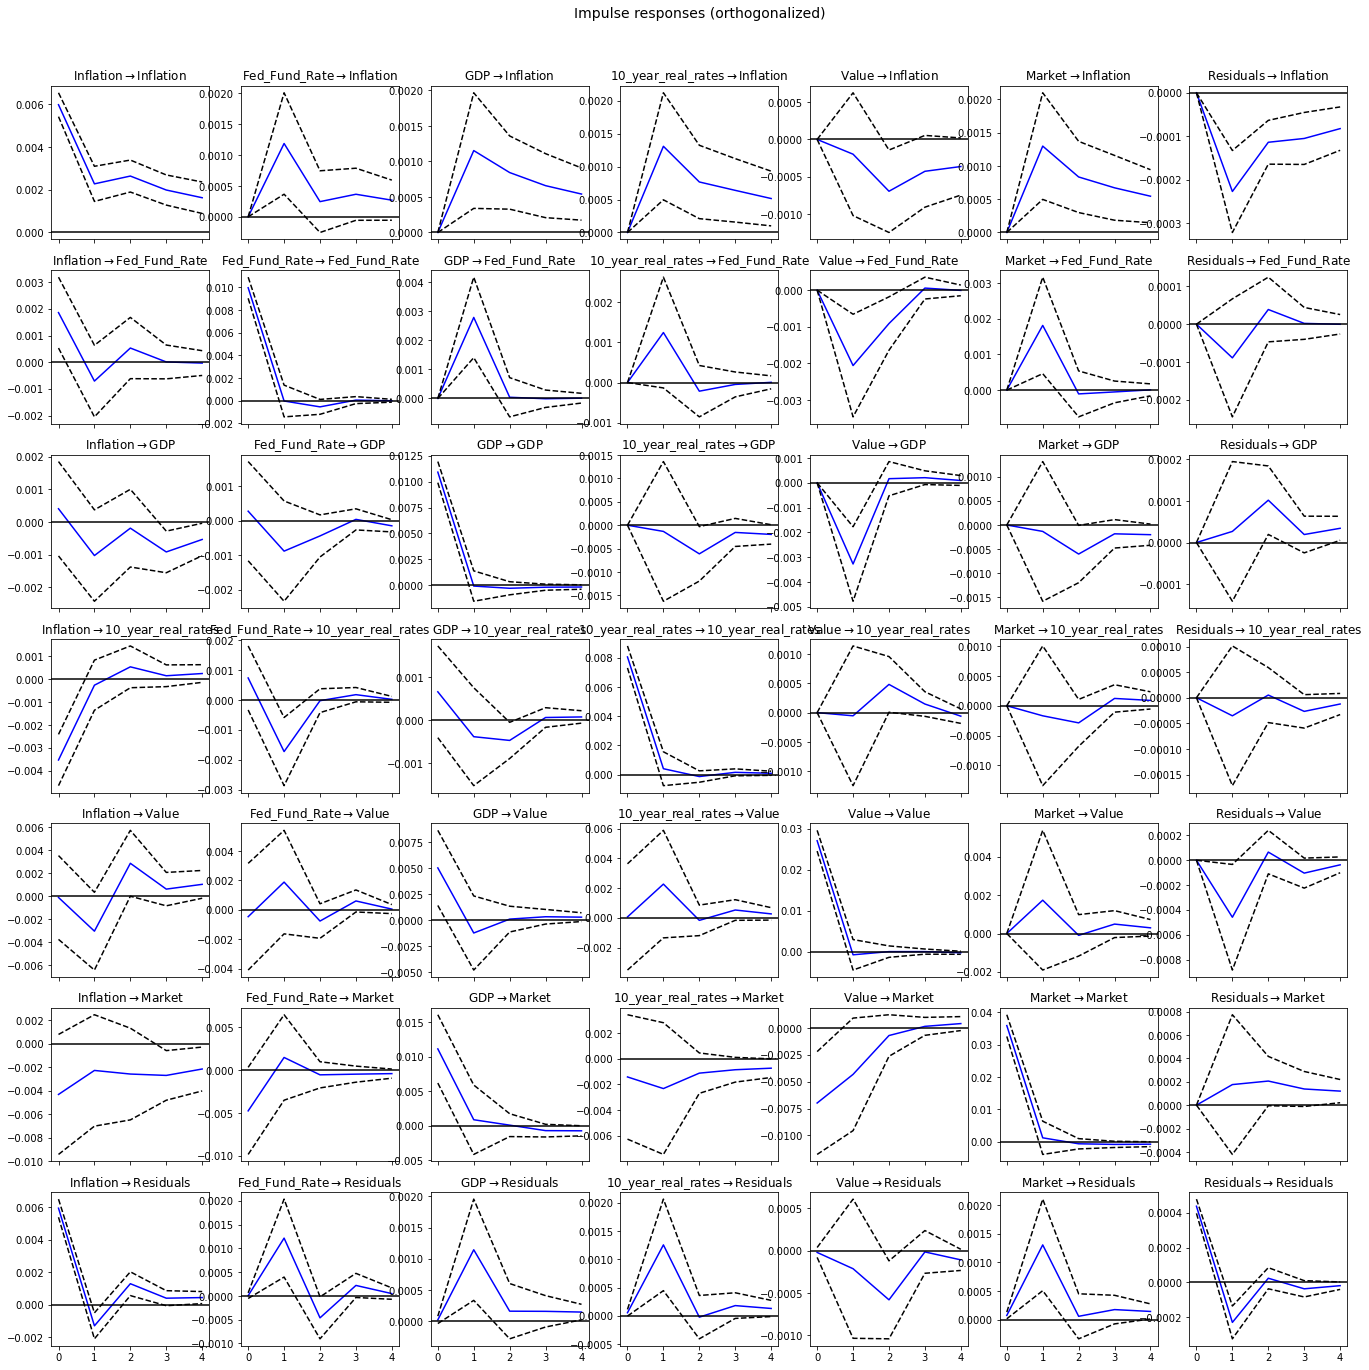

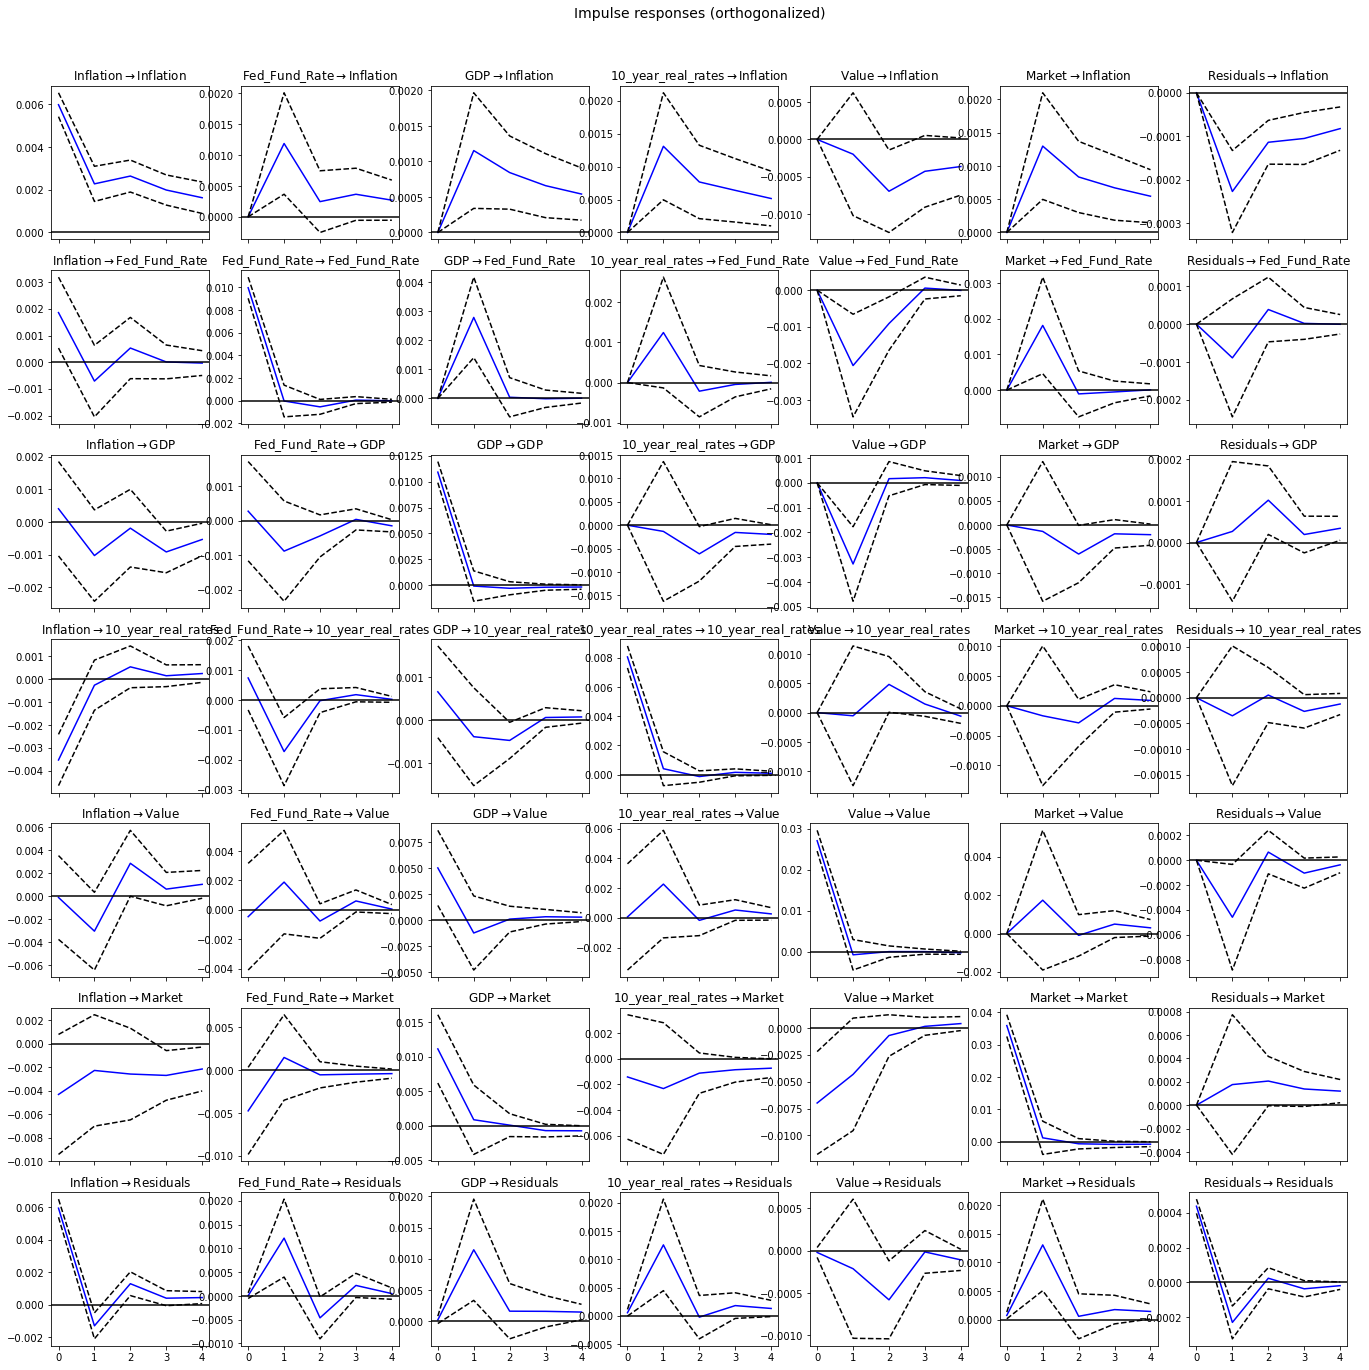

In [ ]:
# Réponse à la question 1.
irf = model_fitted.irf(4)
irf.plot(orth=True, figsize=(20,20))

**Question 2**. Dans le cas spécifique des surprises d'inflation, que pouvez vous déduire de vos résultats? Répondez dans le contexte de la situation actuelle de l'économie mondiale. Quelle doit être la réaction de la banque centrale? Quel conseil pouvez vous lui donner pour l'aider à traverser la situation actuelle?

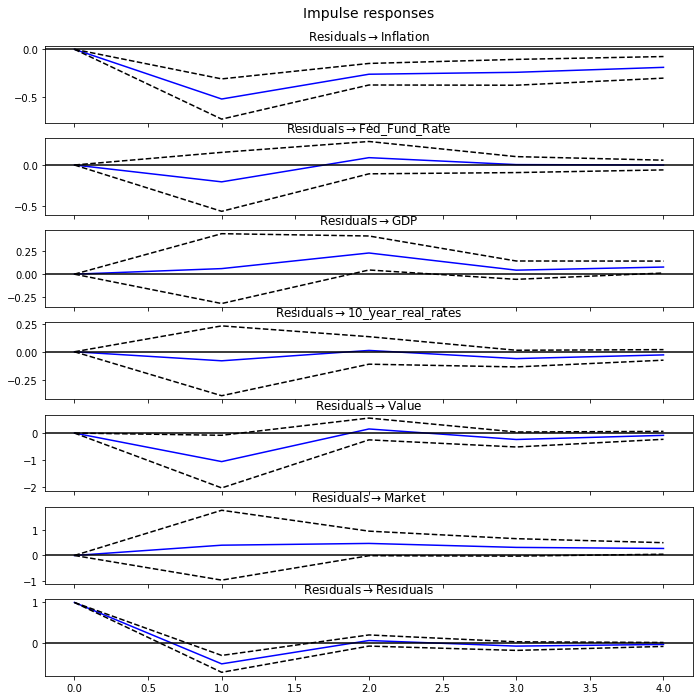

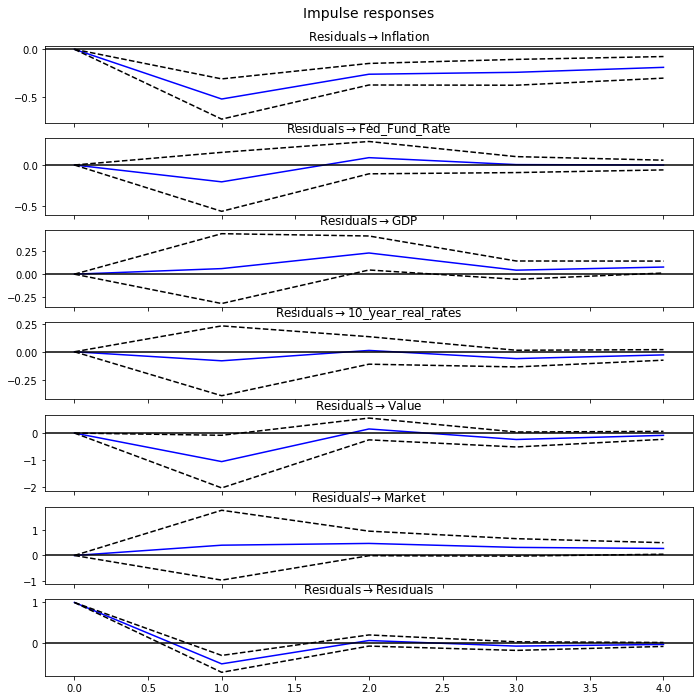

In [ ]:
irf.plot(impulse='Residuals')

**Réponse**:

On peut voir sur les graphiques ci-dessus les effets d'un choc des surprises d'inflations sur les différentes variables macroéconomiques. Premièrement on peut remarquer qu'aucune ne réagit immédiatement (i.e à la période 0) au choc. Pour ce qui est de l'impact sur l'inflation, on observe une baisse avant stabilisation pour les trimestres suivants et sur le long terme. Pour les taux d'intérêts directeurs de la réserve américaine, ces derniers vont les affecter de manière négative jusqu'au premier trimestre avant d'observer une réaction de la FED avec une hausse des taux jusqu'au 2ème trimestre puis une stabilisation. On observe d'ailleurs les mêmes tendances pour les taux d'intérêts réels à 10 ans.

Etant donné les résultats de surprises d'inflation on peut effectivement remarquer que l'inflation observée est plus grande que celle attendue. La banque centrale pour palier à ce problème a tout intérêt à baisser la quantité de monnaie en circulation (masse monétaire) plus particulièrement en augmentant ses taux d'intérêts directeurs.

**Question 3**. Même question pour un gérant de portefeuille action. Expliquez ce que sont les actions "value", par opposition à "growth". Que recommandez vous au gérant action en cas de surprise d'inflation?

**Réponse:**

Dans le contexte actuelle de rebond des marchés financiers qui a suivi la crise du covid on observe un niveau de valorisations très élevée sur l’ensemble des classes d’actifs. Dès lors, un gestionnaire en recherchant les entreprises offrant un important potentiel d'accroissement notamment en s’exposant à des actifs très valorisés dans un style de gestion dit "growth" peut augmenter le risque d’un portefeuille. Sur le long terme, elle pourrait même ne pas pouvoir contrebalancer la perte de pouvoir d’achat liée à l’inflation.

Ainsi il serait plus intéressant de chercher des classes d’actifs moins valorisées, dites "value". C'est-à-dire sélectionner des actions décotées, dont le prix est inférieur à leur valeur intrinsèque (sous estimée par le marché), dans l’espoir qu’une revalorisation se produise. De plus, les actions value, versant des dividendes, elles offrent une protection contre l'inflation.